### Fifa_2018 WorldPrediction using logistic regression Algo

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load dataset
world_cup_dataset = pd.read_csv("./World Cup 2018 Dataset.csv")
reasult = pd.read_csv("./results.csv")

In [3]:
reasult.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Feature Engineering

In [4]:
winners = list()

for i in range(len(reasult["home_team"])):
    if reasult["home_score"][i] < reasult["away_score"][i]:
        winners.append(reasult["away_team"][i])
    elif reasult["home_score"][i] > reasult["away_score"][i]:
        winners.append(reasult["home_team"][i])
    else:
        winners.append("Draw")
        
reasult["win_team"] = winners

reasult["goal_diff"] = np.absolute(reasult["home_score"]-reasult["away_score"])

reasult.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [5]:
#first match played in  1930 and our dataset include match before 1930
reasult.count()

date          40945
home_team     40945
away_team     40945
home_score    40945
away_score    40945
tournament    40945
city          40945
country       40945
neutral       40945
win_team      40945
goal_diff     40945
dtype: int64

In [6]:
data_germany = reasult[(reasult["home_team"] == "Germany")|(reasult["away_team"] == "Germany")]
germany = data_germany.iloc[:]
germany.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,goal_diff
209,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,False,Switzerland,2
216,1908-06-07,Austria,Germany,3,2,Friendly,Vienna,Austria,False,Austria,1
234,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,Germany,1
235,1909-04-04,Hungary,Germany,3,3,Friendly,Budapest,Hungary,False,Draw,0
253,1910-04-03,Switzerland,Germany,2,3,Friendly,Basel,Switzerland,False,Germany,1


In [7]:
year = list()
for row in germany["date"]:
    year.append(int(row[:4]))

germany["match_year"] = year
germany_1930 = germany[germany["match_year"] >=1930]
germany.count()

date          944
home_team     944
away_team     944
home_score    944
away_score    944
tournament    944
city          944
country       944
neutral       944
win_team      944
goal_diff     944
match_year    944
dtype: int64

In [8]:
# No_of_match_Win = len(germany_1930["win_team"] == "Draw")
# print(No_of_match_Win)
(germany_1930["win_team"] == "Draw").value_counts()

False    699
True     180
Name: win_team, dtype: int64

In [9]:
No_of_match_Win = (germany_1930["win_team"] == "Germany").value_counts()[1]
No_of_match_Draw = (germany_1930["win_team"] == "Draw").value_counts()[1]
No_of_match_loss = len(germany_1930["win_team"])-No_of_match_Draw-No_of_match_Win
print("No of match germany lost from 1930 till now is {}".format(No_of_match_loss))
print("No of match germany win from 1930 till now is {}".format(No_of_match_Win))
print("No of match germany draw from 1930 till now is {}".format(No_of_match_Draw))

No of match germany lost from 1930 till now is 171
No of match germany win from 1930 till now is 528
No of match germany draw from 1930 till now is 180


<BarContainer object of 3 artists>

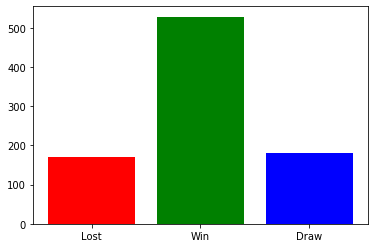

In [10]:
X = np.array([171,528,180])
Y = ["Lost" , "Win", "Draw"]
val = np.arange(1000)
plt.bar(Y,height=X,color=["red","green","blue"])

In [11]:
def convert(row):
        if row == "Germany":
            return "Win"
        elif row == "Draw":
            return "Draw"
        else:
            return "Loss"

/home/puneet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


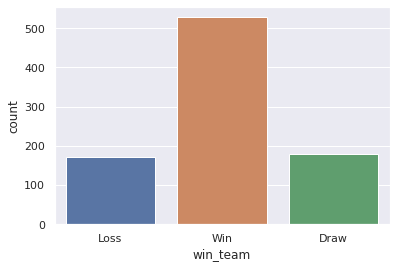

In [12]:
germany_1930["win_team"] = germany_1930["win_team"].apply(convert)
sns.set(style="darkgrid")
sns.countplot(x="win_team",data=germany_1930)

In [13]:
# germany_1930["win_team"]

In [23]:
worldcup_teams = ['Australia', ' Iran', 'Japan', 'Korea Republic', 
            'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria', 
            'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 
            'Panama', 'Argentina', 'Brazil', 'Colombia', 
            'Peru', 'Uruguay', 'Belgium', 'Croatia', 
            'Denmark', 'England', 'France', 'Germany', 
            'Iceland', 'Poland', 'Portugal', 'Russia', 
            'Serbia', 'Spain', 'Sweden', 'Switzerland']
print(len(worldcup_teams))

32


In [15]:
df_team_home = reasult[reasult["home_team"].isin(worldcup_teams)]
df_team_away = reasult[reasult["away_team"].isin(worldcup_teams)]
df_team = pd.concat((df_team_home,df_team_away))
df_team.drop_duplicates()
df_team.count()

date          20420
home_team     20420
away_team     20420
home_score    20420
away_score    20420
tournament    20420
city          20420
country       20420
neutral       20420
win_team      20420
goal_diff     20420
dtype: int64

In [16]:
year = list()
for row in df_team["date"]:
    year.append(int(row[:4]))

df_team["match_year"] = year
df_team_1930 = germany[germany["match_year"] >=1930]
df_team_1930.reset_index(drop = True)
df_team_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team,goal_diff,match_year
1260,1930-03-02,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,Italy,2,1930
1272,1930-05-04,Switzerland,Germany,0,5,Friendly,Zürich,Switzerland,False,Germany,5,1930
1274,1930-05-10,Germany,England,3,3,Friendly,Berlin,Germany,False,Draw,0,1930
1329,1930-09-07,Denmark,Germany,6,3,Friendly,Copenhagen,Denmark,False,Denmark,3,1930
1335,1930-09-28,Germany,Hungary,5,3,Friendly,Dresden,Germany,False,Germany,2,1930


In [17]:
df_team_1930 = df_team.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_diff', 'match_year',"neutral"], axis=1)
df_team_1930.head()

,home_team,away_team,win_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
10,England,Wales,England
11,England,Scotland,England


In [18]:
df_team_1930 = df_team_1930.reset_index(drop=True)

In [19]:
df_team_1930.loc[df_team_1930.win_team == df_team_1930.home_team,'win_team']=2
df_team_1930.loc[df_team_1930.win_team == 'Draw', 'win_team']=1
df_team_1930.loc[df_team_1930.win_team == df_team_1930.away_team, 'win_team']=0

df_team_1930.head()

,home_team,away_team,win_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,England,Wales,2
4,England,Scotland,2


### Dataset Preparation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
final  = pd.get_dummies(df_team_1930,prefix=["home_team","away_team"],columns=["home_team","away_team"])

X_d = final.drop(["win_team"],axis=1)
Y_d = final["win_team"]
Y_d = Y_d.astype("int")
print(X_d.shape)
x_train , x_test, y_train,y_test = train_test_split(X_d,Y_d,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20420, 416)
(14294, 416) (6126, 416) (14294,) (6126,)


In [22]:
final.head() #32*32*2=

,win_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model preparation and training

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
score_train = logreg.score(x_train,y_train)
score_test = logreg.score(x_test,y_test)

print(score_train,score_test)

/home/puneet/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/puneet/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5719882468168462 0.5527260855370552


### Testing dataset Preparation

In [28]:
ranking  = pd.read_csv("datasets/fifa_rankings.csv")
fix = pd.read_csv("datasets/fixtures.csv")

In [29]:
ranking.head()

,Position,Team,Points
0,1,Germany,1533.0
1,2,Brazil,1384.0
2,3,Belgium,1346.0
3,4,Portugal,1306.0
4,5,Argentina,1254.0


In [34]:
fix.head()

,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,Saudi Arabia,Group A,NaN
1,1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,Uruguay,Group A,NaN
2,1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,Iran,Group B,NaN
3,1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,Spain,Group B,NaN
4,1,16/06/2018 13:00,Kazan Arena,France,Australia,Group C,NaN


In [50]:
# fix["Home Team"].map(ranking.set_index("Team")["Position"])

In [51]:
r_nw = ranking.set_index("Team")
r_nw_pos = r_nw["Position"] #dataframe is collection of series 
print(type(r_nw))           #series is datastructure for a single col in dataframe
print(type(r_nw_pos))
# r_nw_pos
#col1.map(col2) #here -> 2nd column of caller of map function must be same as index column of passed series.
                # -> The values of common column must be unique too.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [53]:
fix.insert(1, 'first_position', fix['Home Team'].map(ranking.set_index('Team')['Position']))
fix.insert(2, 'second_position', fix['Away Team'].map(ranking.set_index('Team')['Position']))
fix = fix.iloc[:48, :]
fix.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,3,6.0,25.0,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,Costa Rica,Group E,NaN
44,3,60.0,10.0,28/06/2018 17:00,Volgograd Stadium,Japan,Poland,Group H,NaN
45,3,28.0,16.0,28/06/2018 17:00,Samara Stadium,Senegal,Colombia,Group H,NaN
46,3,55.0,14.0,28/06/2018 21:00,Saransk Stadium,Panama,Tunisia,Group G,NaN
47,3,13.0,3.0,28/06/2018 21:00,Kaliningrad Stadium,England,Belgium,Group G,NaN


In [55]:
# iterrows() returns an iterator containing index of each row 
pred_dataset = list()
for idx , row in fix.iterrows():
    if row["first_position"] < row["second_position"]:
        pred_dataset.append({"home_team":row["Home Team"],"away_team":row["Away Team"] , "win_team":None})
        
    else:
        pred_dataset.append({"home_team":row["Away Team"],"away_team":row["Home Team"] ,"win_team":None})
pred_dataset = pd.DataFrame(pred_dataset)
temp_pred_dataset = pred_dataset

pred_dataset.head()

,away_team,home_team,win_team
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [58]:
pred_dataset = pd.get_dummies(pred_dataset, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

mis_cols = set(final.columns) - set(pred_dataset.columns)
for c in mis_cols:
    pred_dataset[c] = 0
pred_dataset = pred_dataset[final.columns]

pred_dataset = pred_dataset.drop(['win_team'], axis=1)

pred_dataset.head()


,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prediciton

In [62]:

#group matches 
predictions = logreg.predict(pred_dataset)
for i in range(fix.shape[0]):
    print(temp_pred_dataset.iloc[i, 1] + " and " + temp_pred_dataset.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + temp_pred_dataset.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + temp_pred_dataset.iloc[i, 0])
    print('Probability of ' + temp_pred_dataset.iloc[i, 1] + ' winning: ', '%.2f'%(logreg.predict_proba(pred_dataset)[i][2]))
    print('Probability of Draw: ', '%.2f'%(logreg.predict_proba(pred_dataset)[i][1]))
    print('Probability of ' + temp_pred_dataset.iloc[i, 0] + ' winning: ', '%.2f'%(logreg.predict_proba(pred_dataset)[i][0]))
    print("")

Russia and Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.702
Probability of Draw:  0.206
Probability of Saudi Arabia winning:  0.092

Uruguay and Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.588
Probability of Draw:  0.334
Probability of Egypt winning:  0.078

Iran and Morocco
Draw
Probability of Iran winning:  0.282
Probability of Draw:  0.379
Probability of Morocco winning:  0.340

Portugal and Spain
Winner: Spain
Probability of Portugal winning:  0.338
Probability of Draw:  0.307
Probability of Spain winning:  0.355

France and Australia
Winner: France
Probability of France winning:  0.650
Probability of Draw:  0.206
Probability of Australia winning:  0.144

Argentina and Iceland
Winner: Argentina
Probability of Argentina winning:  0.821
Probability of Draw:  0.147
Probability of Iceland winning:  0.033

Peru and Denmark
Winner: Peru
Probability of Peru winning:  0.433
Probability of Draw:  0.185
Probability of Denmark winning:  0.382

Croatia and Nigeria